In [183]:
from package import process_dataset
from package import encoder
from package import models

import numpy as np

from sklearn.model_selection import train_test_split
import pandas as pd

import matplotlib.pyplot as plt

In [184]:
description = pd.read_csv("data/dicionario.csv", encoding='latin-1')
train = pd.read_csv("data/dados_treino_hackaton.csv", encoding='latin-1', index_col=False)
test = pd.read_csv("data/dados_teste_x_hackaton.csv", encoding='latin-1', index_col=False)

del train['Unnamed: 0']
del test['Unnamed: 0']

In [185]:
train = encoder.encode_DataFrame(train)
train = process_dataset.processColumns(train)

In [186]:
train_cols, target = process_dataset.generate_labels(train)

In [187]:
X = process_dataset.scaleData(train[train_cols], useSaved=False)
y = train[target]

In [196]:
# for i in range(10000, 20000):
#     #podemos variar o test_size de 0.1 até 0.2 ver como os modelos treinam melhor
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
#     lin = LinearRegression()
#     lin.fit(X_train, y_train)
#     pred = lin.predict(X_test)
#     ypred = models.convertPredicted(pred)
    
#     if models.accuracy_score(y_test, ypred) > 0.85:
#         print(i, models.accuracy_score(y_test, ypred))

10306 0.8548387096774194
10462 0.8548387096774194
10721 0.8548387096774194
11085 0.8709677419354839
11864 0.8709677419354839
12153 0.8548387096774194
13213 0.8548387096774194
13522 0.8548387096774194
13536 0.8548387096774194
13823 0.8548387096774194
14336 0.8548387096774194
14822 0.8548387096774194
15036 0.8548387096774194
15697 0.8548387096774194
16161 0.8548387096774194
16314 0.8548387096774194
16492 0.8548387096774194
17123 0.8709677419354839
17456 0.8709677419354839
17482 0.8548387096774194
19220 0.8870967741935484
19737 0.8548387096774194


In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19220)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Linear regression

In [218]:
from sklearn.linear_model import LinearRegression

In [219]:
lin = LinearRegression()

In [220]:
lin.fit(X_train, y_train)

LinearRegression()

In [221]:
pred = lin.predict(X_test)

In [222]:
ypred = models.convertPredicted(pred)

models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        32
           1       0.79      0.63      0.70        30

    accuracy                           0.74        62
   macro avg       0.75      0.74      0.74        62
weighted avg       0.75      0.74      0.74        62

Accuracy score:  0.7419354838709677
Mean Squared Error:  0.25806451612903225
roc_auc score:  0.7385416666666667





In [1]:
import joblib

In [226]:
ypred = models.convertPredicted(pred)
models.run_analysis(ypred, y_train)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       294
           1       0.70      0.68      0.69       257

    accuracy                           0.72       551
   macro avg       0.72      0.71      0.71       551
weighted avg       0.72      0.72      0.72       551

Accuracy score:  0.7168784029038112
Mean Squared Error:  0.2831215970961887
roc_auc score:  0.7143717409142646





In [237]:
x = pd.DataFrame()

In [238]:
x['id_fechou'] = ypred

In [240]:
x['prob_id_fechou'] = pred

In [241]:
x

,id_fechou,prob_id_fechou
0,1,0.607646
1,1,0.502927
2,0,0.258069
3,1,0.998131
4,0,0.365622
...,...,...
546,1,0.676056
547,1,0.752171
548,1,0.762252
549,0,0.458064


In [115]:
import matplotlib.pyplot as plt

In [116]:
from sklearn.metrics import confusion_matrix, roc_curve, classification_report

In [117]:
import ast

In [118]:
classification_report(y_test, ypred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.97      0.87        32\n           1       0.96      0.73      0.83        30\n\n    accuracy                           0.85        62\n   macro avg       0.88      0.85      0.85        62\nweighted avg       0.87      0.85      0.85        62\n'

In [119]:
#ast.literal_eval(str(confusion_matrix(y_test, ypred)).replace(" ", ","))

In [120]:
fpr, tpr, _  = roc_curve(y_test,  pred)

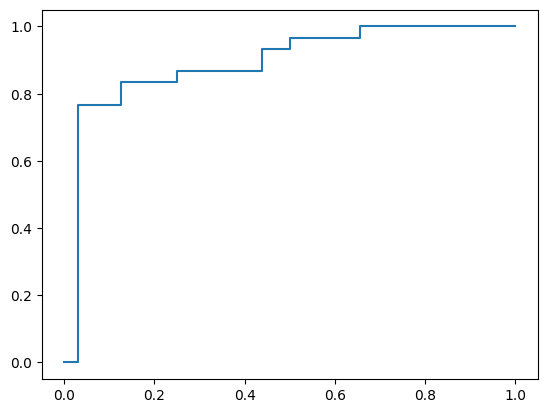

In [121]:
plt.plot(fpr,tpr)

## Decision tree regressor

In [164]:
from sklearn.tree import DecisionTreeRegressor

In [165]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [168]:
models.run_analysis(tree.predict(X_test), y_test)

              precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.65      0.81      0.72        27

    accuracy                           0.73        62
   macro avg       0.73      0.74      0.73        62
weighted avg       0.75      0.73      0.73        62

Accuracy score:  0.7258064516129032
Mean Squared Error:  0.27419354838709675
roc_auc score:  0.735978835978836





## Random Forest Regressor

In [125]:
from sklearn.ensemble import RandomForestRegressor

In [126]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [127]:
ypred = models.convertPredicted(forest.predict(X_test))

In [128]:
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        32
           1       0.79      0.63      0.70        30

    accuracy                           0.74        62
   macro avg       0.75      0.74      0.74        62
weighted avg       0.75      0.74      0.74        62

Accuracy score:  0.7419354838709677
Mean Squared Error:  0.25806451612903225
roc_auc score:  0.7385416666666667





## Testing polynomial regressor

In [129]:
from sklearn.preprocessing import PolynomialFeatures

In [130]:
p = PolynomialFeatures(degree = 3, include_bias=False)

In [131]:
pX_train = p.fit_transform(X_train)

In [132]:
lin = LinearRegression()
lin.fit(pX_train, y_train)

LinearRegression()

In [133]:
pred = lin.predict(p.transform(X_test))
ypred = models.convertPredicted(pred)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.56      0.56      0.56        32
           1       0.53      0.53      0.53        30

    accuracy                           0.55        62
   macro avg       0.55      0.55      0.55        62
weighted avg       0.55      0.55      0.55        62

Accuracy score:  0.5483870967741935
Mean Squared Error:  0.45161290322580644
roc_auc score:  0.5479166666666666





## SGD Regression

In [134]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

from sklearn.base import clone

In [135]:
sgd = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

In [136]:
minimal_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(6000):
    sgd.fit(X_train, y_train)
    y_val_pred = sgd.predict(X_test)
    val_error = mean_squared_error(y_test, y_val_pred)
    if val_error < minimal_error:
        minimal_error = val_error
        best_epoch = epoch
        best_model = clone(sgd)


In [137]:
ypred = models.convertPredicted(sgd.predict(X_test))
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        32
           1       0.96      0.73      0.83        30

    accuracy                           0.85        62
   macro avg       0.88      0.85      0.85        62
weighted avg       0.87      0.85      0.85        62

Accuracy score:  0.8548387096774194
Mean Squared Error:  0.14516129032258066
roc_auc score:  0.8510416666666667





## Logistic Regression

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
log = LogisticRegression()

In [140]:
log.fit(X_train, y_train)

LogisticRegression()

In [141]:
ypred = log.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.88      0.77      0.82        30

    accuracy                           0.84        62
   macro avg       0.85      0.84      0.84        62
weighted avg       0.84      0.84      0.84        62

Accuracy score:  0.8387096774193549
Mean Squared Error:  0.16129032258064516
roc_auc score:  0.8364583333333333





## Support vector machines

In [142]:
from sklearn.svm import LinearSVC

In [143]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [144]:
ypred = svm.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.92      0.73      0.81        30

    accuracy                           0.84        62
   macro avg       0.85      0.84      0.84        62
weighted avg       0.85      0.84      0.84        62

Accuracy score:  0.8387096774193549
Mean Squared Error:  0.16129032258064516
roc_auc score:  0.8354166666666667





In [145]:
from sklearn.svm import SVC

In [146]:
svm = SVC(kernel='poly', C=10)
svm.fit(X_train, y_train)

SVC(C=10, kernel='poly')

In [147]:
ypred = svm.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        32
           1       0.77      0.67      0.71        30

    accuracy                           0.74        62
   macro avg       0.75      0.74      0.74        62
weighted avg       0.74      0.74      0.74        62

Accuracy score:  0.7419354838709677
Mean Squared Error:  0.25806451612903225
roc_auc score:  0.7395833333333333





## Decision tree classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [96]:
ypred = tree.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        35
           1       0.71      0.44      0.55        27

    accuracy                           0.68        62
   macro avg       0.69      0.65      0.65        62
weighted avg       0.68      0.68      0.66        62

Accuracy score:  0.6774193548387096
Mean Squared Error:  0.3225806451612903
roc_auc score:  0.6507936507936508





In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

In [98]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

In [99]:
voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard'
)
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [100]:
ypred = voting.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.70      0.78      0.74        27

    accuracy                           0.76        62
   macro avg       0.76      0.76      0.76        62
weighted avg       0.76      0.76      0.76        62

Accuracy score:  0.7580645161290323
Mean Squared Error:  0.24193548387096775
roc_auc score:  0.7603174603174603





In [101]:
import xgboost

In [102]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [103]:
ypred = xgb.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        35
           1       0.68      0.78      0.72        27

    accuracy                           0.74        62
   macro avg       0.74      0.75      0.74        62
weighted avg       0.75      0.74      0.74        62

Accuracy score:  0.7419354838709677
Mean Squared Error:  0.25806451612903225
roc_auc score:  0.746031746031746





In [104]:
xgb = xgboost.XGBClassifier(
        max_depth=2,
        gamma=0.1,
        eta=1.5,
        reg_alpha=1.1,
        reg_lambda=0.7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=1.5,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=1.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1.1, ...)

In [105]:
ypred = xgb.predict(X_test)
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        35
           1       0.62      0.78      0.69        27

    accuracy                           0.69        62
   macro avg       0.70      0.70      0.69        62
weighted avg       0.71      0.69      0.69        62

Accuracy score:  0.6935483870967742
Mean Squared Error:  0.3064516129032258
roc_auc score:  0.7031746031746031





In [106]:
from sklearn.metrics import accuracy_score
import xgboost

In [107]:
def run_XGB(X_train, X_test, y_train, y_test, max_depth=2, gamma=0.3, eta=0.5, reg_alpha=0.5, reg_lambda=0.7, prints=False):

    model = xgboost.XGBClassifier(
        max_depth=max_depth,
        gamma=gamma,
        eta=eta,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda
    )

    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    
    return model, acc 

In [108]:
lm = 0
for md in np.arange(1, 5):
    for gam in np.arange(0.1, 3, 0.2):
        for eta in np.arange(0.1, 2, 0.2):
            for ra in np.arange(0.1, 1.5, 0.2):
                for rl in np.arange(0.1, 1.5, 0.2):
                    _, r = run_XGB(X_train, X_test, y_train, y_test, md, gam, eta, ra, rl)
                    if r > lm:
                        lm = r
                        print("HIGHER ", lm)
                        print(md, gam, eta, ra, rl)
                        print("")

HIGHER  0.7419354838709677
1 0.1 0.1 0.1 0.1

HIGHER  0.7580645161290323
1 0.1 0.1 0.1 0.30000000000000004

HIGHER  0.7741935483870968
1 0.1 0.1 0.9000000000000001 0.1

HIGHER  0.7903225806451613
1 0.1 1.1000000000000003 1.3000000000000003 0.5000000000000001



KeyboardInterrupt: 

# Fine Tuning

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = [
    {'n_estimators': [3, 7, 10, 20, 30], 'max_features': [2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 7, 10, 12], 'max_features': [2, 3, 4, 8, 12, 15]},
]

In [61]:
forest = RandomForestRegressor()

In [62]:
grid = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True, refit=True)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 7, 10, 20, 30]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 8, 12, 15],
                          'n_estimators': [3, 7, 10, 12]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid.best_params_

{'max_features': 6, 'n_estimators': 20}

In [65]:
ypred = models.convertPredicted(grid.predict(X_test))

In [66]:
models.run_analysis(ypred, y_test)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        63
           1       0.69      0.57      0.62        60

    accuracy                           0.67       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.67      0.67      0.66       123

Accuracy score:  0.6666666666666666
Mean Squared Error:  0.3333333333333333
roc_auc score:  0.6642857142857143





## Importancia de colunas

In [68]:
sorted(zip(grid.best_estimator_.feature_importances_, train_cols))

[(0.007352370756300068, 'Produtos digitais'),
 (0.011183698020567599, 'Desdobramento de metas'),
 (0.014418867149368728, 'Processes Excellence'),
 (0.015982270336099787, 'n_solucoes'),
 (0.016747719144998983, 'Gestão da Receita_per_Gestão de Gastos'),
 (0.027593004968354252, 'Gestão da Operação'),
 (0.027860640436120594, 'numero_relacionamentos_convertidos'),
 (0.031658920749696236, 'Forma_de_Contratacao_Agregado'),
 (0.0353008932817207, 'numero_relacionamentos'),
 (0.036211275838360445, 'Faixa_de_Faturamento_Agregado'),
 (0.038508712551839866, 'Carteira_Nova'),
 (0.04317476382889312, 'Classificacao_da_Oportunidade'),
 (0.051019106282418236, 'Segmentacao'),
 (0.05411990942274823,
  'numero_relacionamentos_convertidos_per_numero_relacionamentos'),
 (0.055098638781501216, 'intervalo_tempo'),
 (0.056771482002475816, 'Segmento_Agregado2'),
 (0.06473088705900854, 'Total_HH'),
 (0.0648181169745398, 'Valor_corrigido2'),
 (0.0742810738893781, 'Data_Real_de_Encerramento_da_Opp2'),
 (0.086004655

## Using cross validation

In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [70]:
scores = cross_val_score(tree, X, y, scoring="neg_mean_squared_error", cv=10)

In [73]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())

In [74]:
display_scores(np.sqrt(-scores))

Scores:  [0.53881591 0.5819877  0.5819877  0.55809982 0.65286255 0.66529914
 0.57259833 0.52790958 0.6005462  0.6005462 ]
Mean:  0.5880653123548789
Std:  0.0421076487647239


In [75]:
models.run_analysis(cross_val_predict(tree, X, y, cv=10), y)

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       326
           1       0.68      0.49      0.57       287

    accuracy                           0.65       613
   macro avg       0.66      0.64      0.64       613
weighted avg       0.66      0.65      0.64       613

Accuracy score:  0.6525285481239804
Mean Squared Error:  0.3474714518760196
roc_auc score:  0.6428838631068168



